In [1]:

import os
import torch
from matplotlib import pyplot as plt
from IPython.display import Image
from pytorch_lightning import seed_everything
seed_everything(0)

from datasets.datasets import RigidBodyDataset
from systems.bouncing_point_masses import BouncingPointMasses
from systems.bouncing_disks import BouncingDisks
from systems.chain_pendulum_with_contact import ChainPendulumWithContact
from systems.rope import Rope
from systems.gyroscope_with_wall import GyroscopeWithWall

GIFS_DIR = './gifs'
os.makedirs(GIFS_DIR, exist_ok=True)


## Bouncing Point Masses

In [2]:
body_kwargs = {
    "n_o": 3,
    "ms": [0.05, 0.1, 0.3],
    "ls": [0.05, 0.1, 0.15],
    "mus": [0.0] * (3 * 2 // 2 + 3 * 4),
    "cors": [1.0] * (3 * 2 // 2 + 3 * 4),
    "g": 0.0
}
body = BouncingPointMasses(**body_kwargs)
dataset = RigidBodyDataset(
    mode = "test",
    n_traj = 1,
    body = body,
    dtype = torch.float32,
    chunk_len = 100,
    regen=True
)

generating trajectories (mode: test), this might take a while...
1 out of 1 trajectories contains collision.


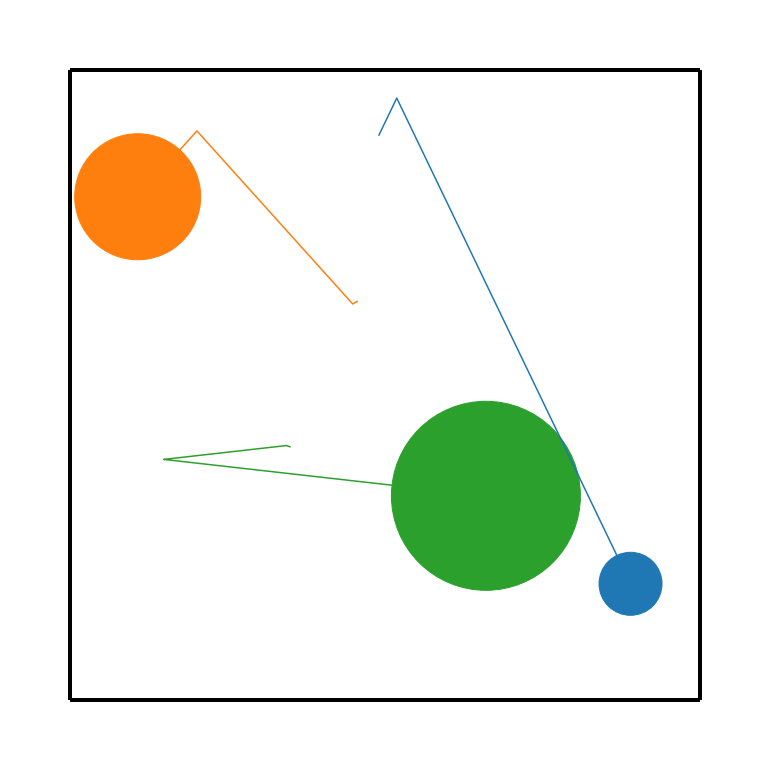

In [3]:
anim = body.animate(dataset.zs, 0)
file_name = os.path.join(GIFS_DIR, 'BM3.gif')
anim.save(file_name, writer="pillow")
Image(url=file_name)


## Bouncing Disks

In [4]:
body_kwargs = {
    "n_o": 3,
    "ms": [0.05, 0.1, 0.3],
    "ls": [0.05, 0.1, 0.15],
    "mus": [0.4] * (3 * 2 // 2 + 3 * 4),
    "cors": [1.0] * (3 * 2 // 2 + 3 * 4),
    "g": 9.8
}
body = BouncingDisks(**body_kwargs)
dataset = RigidBodyDataset(
    mode = "test",
    n_traj = 1,
    body = body,
    dtype = torch.float32,
    chunk_len = 100,
    regen=True
)

generating trajectories (mode: test), this might take a while...
1 out of 1 trajectories contains collision.


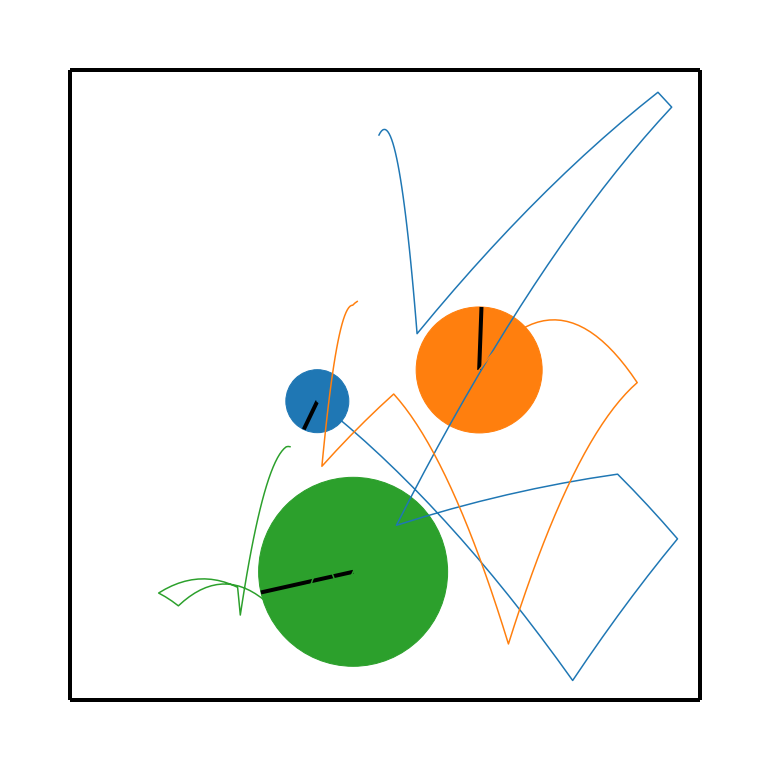

In [5]:
anim = body.animate(dataset.zs, 0)
file_name = os.path.join(GIFS_DIR, 'BD3.gif')
anim.save(file_name, writer="pillow")
Image(url=file_name)

## Chain Pendulums

In [6]:
body_kwargs = {
    "n_o": 2,
    "ms": [0.3, 0.4],
    "ls": [0.5, 0.6],
    "mus": [0.2],
    "cors": [0.9],
    "g": 9.8
}
body = ChainPendulumWithContact(**body_kwargs)
dataset = RigidBodyDataset(
    mode = "test",
    n_traj = 1,
    body = body,
    dtype = torch.float32,
    chunk_len = 100,
    regen=True
)

generating trajectories (mode: test), this might take a while...
1 out of 1 trajectories contains collision.


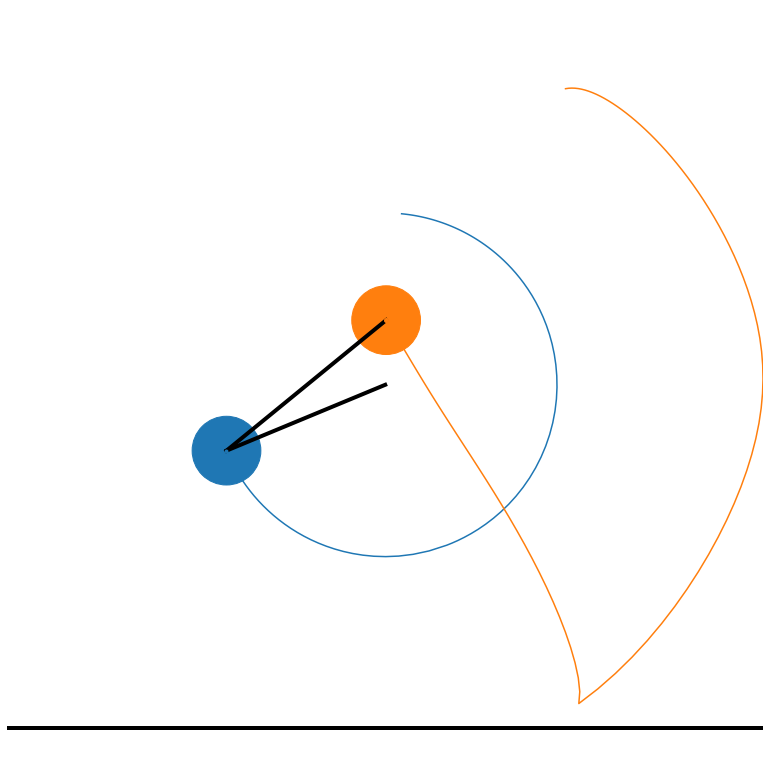

In [7]:
anim = body.animate(dataset.zs, 0)
file_name = os.path.join(GIFS_DIR, 'CP2.gif')
anim.save(file_name, writer="pillow")
Image(url=file_name)